# Test Force Single Fluid
ebtel++ has an option to force the equations to be single fluid. It seems that for **very** strong heating, this fix may not work so well...

In [2]:
import os
import sys
import copy
import subprocess
from collections import namedtuple

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

sys.path.append('/home/wtb2/Documents/codes/rsp_toolkit/python/')
from xml_io import OutputHandler,InputHandler

%matplotlib inline

## Base Configuration

In [4]:
ih = InputHandler('/home/wtb2/Documents/codes/ebtelPlusPlus/config/ebtel.example.cfg.xml')
base_config = ih.lookup_vars()
# make any modificiations to the base configuration here
base_config['heating']['partition'] = 0.5
base_config['force_single_fluid'] = True
base_config['use_adaptive_solver'] = True
base_config['tau'] = 1.0
base_config['adaptive_solver_safety'] = 0.5
base_config['adaptive_solver_error'] = 1e-6
base_config['use_flux_limiting'] = True
base_config['output_filename'] = 'test_single_fluid_case'

## Heating Scenarios

In [5]:
event_parameters = [
    {'magnitude':25,'rise_start':0.,'rise_end':5.,'decay_start':5.,'decay_end':10.},
    {'magnitude':0.25,'rise_start':0.,'rise_end':5.,'decay_start':5.,'decay_end':10.},
    {'magnitude':1.,'rise_start':0.,'rise_end':100.,'decay_start':100.,'decay_end':200.},
    #{'rise_start':0.0,'rise_end':250.0,'decay_start':1000.0,'decay_end':2000.0,'magnitude':0.005}
]

## Run Simulations

In [6]:
results = []
result = namedtuple('result','time Te Ti n h')

In [7]:
for event in event_parameters:
    oh = OutputHandler('test_single_fluid_tmp.xml',copy.deepcopy(base_config))
    oh.output_dict['heating']['events'] = [{'event':event}]
    oh.print_to_xml()
    subprocess.call([os.path.join('/home/wtb2/Documents/codes/','ebtelPlusPlus/bin/ebtel++.run'),
                     '-c','test_single_fluid_tmp.xml'])
    tmp = np.loadtxt('test_single_fluid_case')
    results.append(result(tmp[:,0],tmp[:,1],tmp[:,2],tmp[:,3],tmp[:,-1]))

## Plotting

In [8]:
colors = sns.color_palette('Set1',n_colors=len(event_parameters))

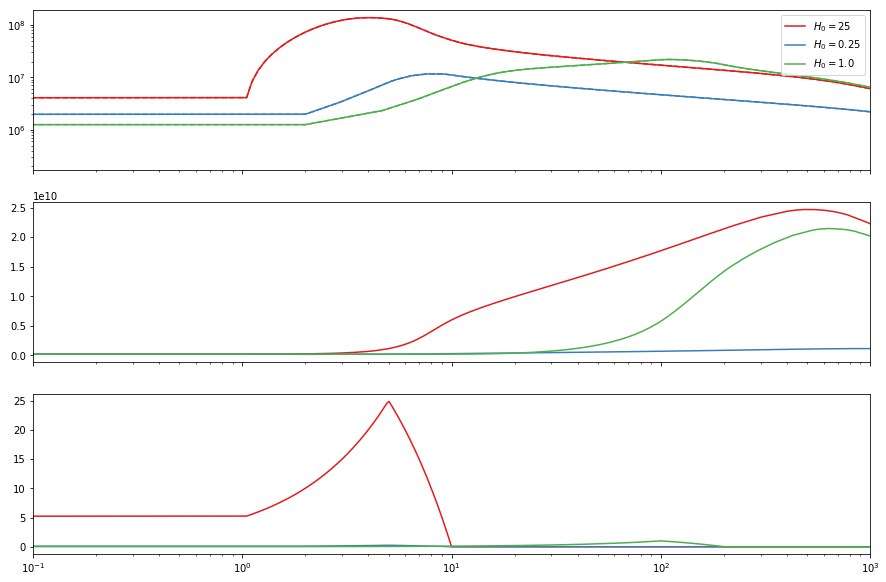

In [9]:
fig,axes = plt.subplots(3,1,figsize=(15,10),sharex=True)
for param,res,col in zip(event_parameters,results,colors):
    axes[0].plot(res.time,res.Te,color=col,ls='-',label=r'$H_0={}$'.format(param['magnitude']))
    axes[0].plot(res.time,res.Ti,color=col,ls='--')
    axes[1].plot(res.time,res.n,color=col)
    axes[2].plot(res.time,res.h,color=col)
axes[0].set_xlim([0.1,1000])#base_config['total_time']])
#ax.set_ylim([0,1e7])
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].legend(loc=1)